In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
sklearn.__version__

'1.6.1'

In [4]:
df = pd.read_csv('laptop_data.csv')

In [6]:
df.head()

Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [8]:
df.shape

(1303, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [12]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [13]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [14]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu Ram               Memory  \
0        Intel Core i5 2.3GHz   8            128GB SSD   
1        Intel Core i5 1.8GHz   8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3        Intel Core i7 2.7GHz  16            512GB SSD   
4        Intel Core i5 3.1GHz   8            256GB SSD   

                            Gpu  OpSys Weight        Price  
0  Intel Iris Plus Graphics 640  macOS   1.37   71378.6832  
1        Intel HD Graphics 6000  macOS   1.34   47895.5232  
2         Intel HD Graphics 620  No OS   1.86   30636.0000  
3            AMD Radeon Pro 455  macOS   1.83  135195.3360  
4  Intel Iris Plus Graphics 650  macOS   1.37   96095.8080

In [15]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [16]:
df

Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu  Ram               Memory  \
0                     Intel Core i5 2.3GHz    8            128GB SSD   
1                     Intel Core i5 1.8GHz    8  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3                     Intel Core i7 2.7GHz   16            512GB SSD   
4                     Intel Core i5 3.1GHz    8            256GB SSD   
...                                    ...  ...                  ...   
1298            Intel Core i7 6500U 2.5GHz    4            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz   16            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz    2   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz    6              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz    4            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS    1.37   71378.6832  
1           Intel HD Graphics 6000       macOS    1.34   47895.5232  
2            Intel HD Graphics 620       No OS    1.86   30636.0000  
3               AMD Radeon Pro 455       macOS    1.83  135195.3360  
4     Intel Iris Plus Graphics 650       macOS    1.37   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10    1.80   33992.6400  
1299         Intel HD Graphics 520  Windows 10    1.30   79866.7200  
1300             Intel HD Graphics  Windows 10    1.50   12201.1200  
1301            AMD Radeon R5 M330  Windows 10    2.19   40705.9200  
1302             Intel HD Graphics  Windows 10    2.20   19660.3200  

[1303 rows x 11 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


<Axes: xlabel='Price', ylabel='Count'>

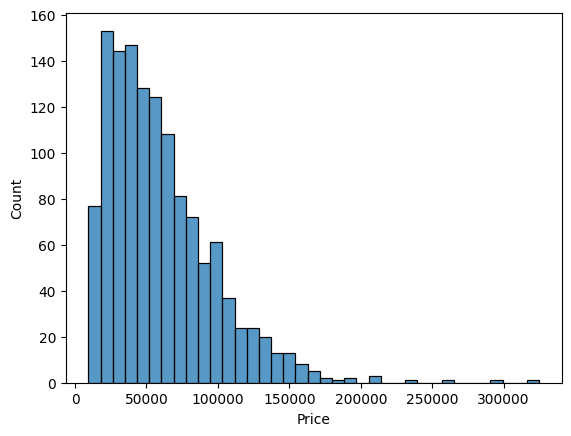

In [18]:
sns.histplot(df['Price'])

<Axes: xlabel='Company'>

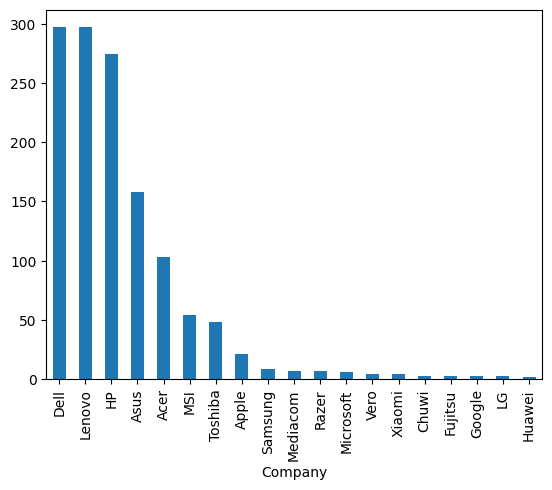

In [19]:
df['Company'].value_counts().plot(kind='bar')


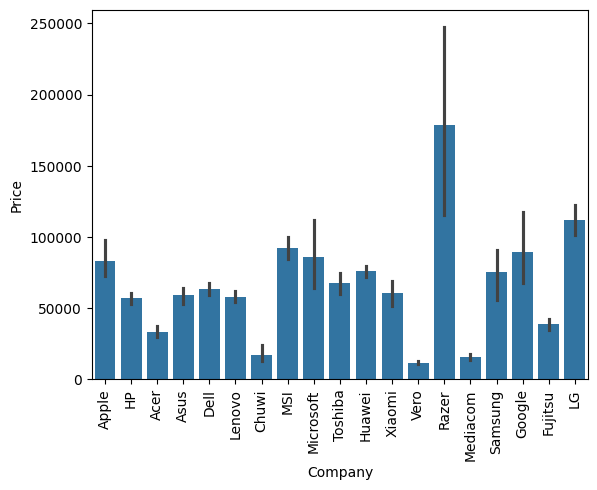

In [20]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

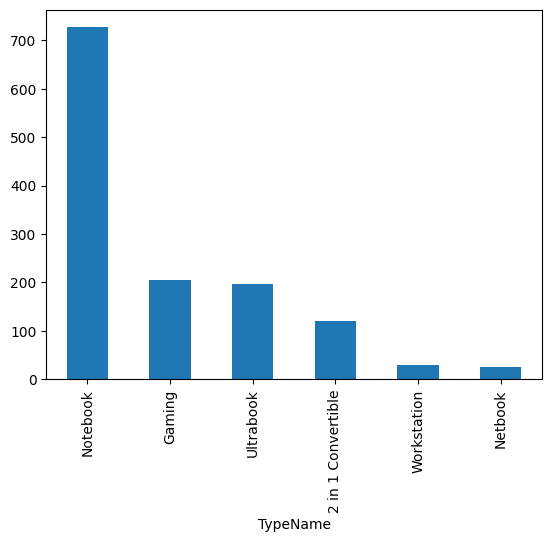

In [21]:
df['TypeName'].value_counts().plot(kind='bar')

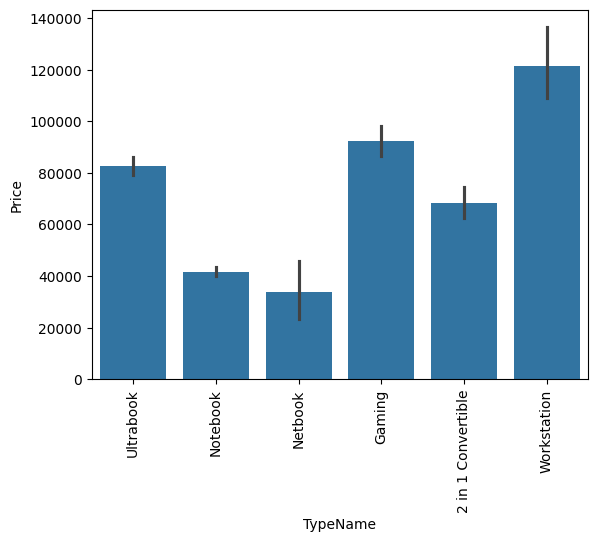

In [22]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Count'>

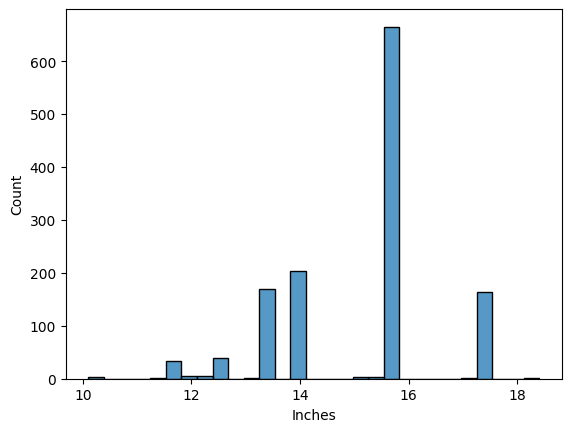

In [23]:
sns.histplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

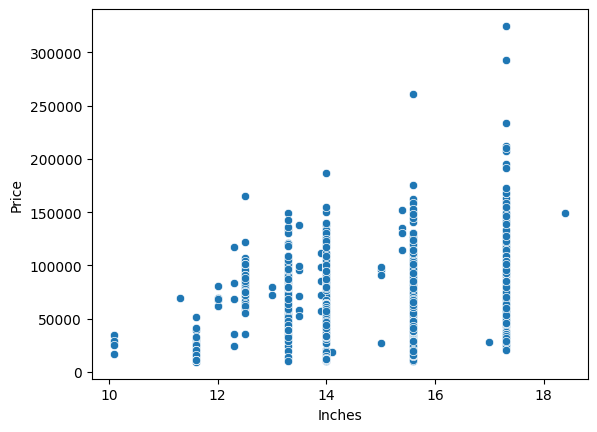

In [24]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [25]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Retina Display 2880x1800                 4
1440x900                                           4
IPS Panel Touchscreen 1920x1200                    4
IPS Panel 2560x1440                                4
IPS Panel Quad HD+ 2560x1440                       3
IPS Panel Touchscreen 1366x768                     3
Quad HD+ 3200x1800                                 3
1920x1080                                          3
2560x1440                                          3
Touchscreen 2400x1600                              3
IPS Panel Quad HD+ 3200x1800                       2
IPS Panel Full HD 2160x1440                        2
IPS Panel Touchscreen / 4K Ultra HD 3840x2160      2
IPS Panel Full HD 1366x768                         1
Touchscreen / Quad HD+ 3200x1800                   1
IPS Panel Retina Display 2736x1824                 1
IPS Panel Full HD 2560x1440                        1
IPS Panel Full HD 1920x1200                        1
Touchscreen / Full HD 1920x1080                    1
Touchscreen / 4K Ultra HD 3840x2160                1
IPS Panel Touchscreen 2400x1600                    1
Name: count, dtype: int64

In [32]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [35]:
df.head()


Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0  
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0  
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0  
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0  
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0

<Axes: xlabel='Touchscreen'>

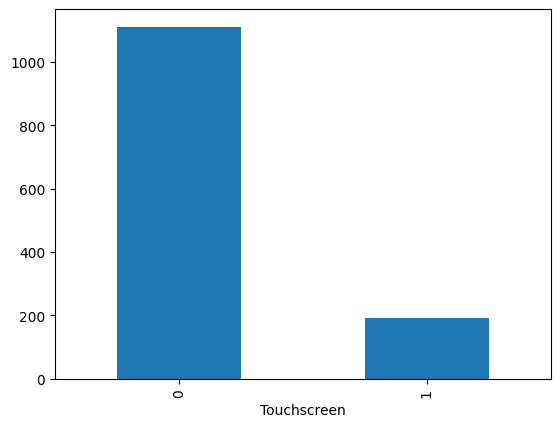

In [34]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

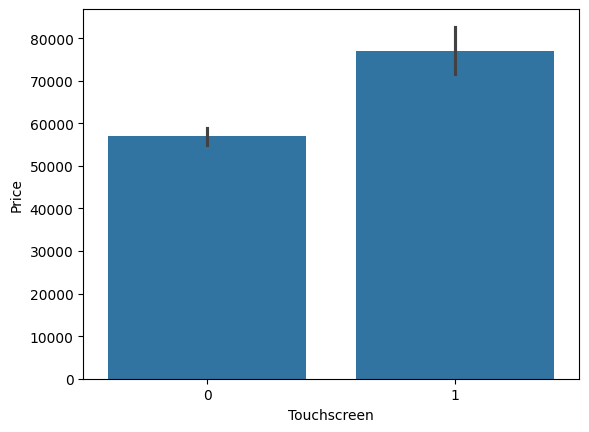

In [36]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [37]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [40]:
#df.tail()
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1  
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0  
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0  
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1  
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1

<Axes: xlabel='Ips'>

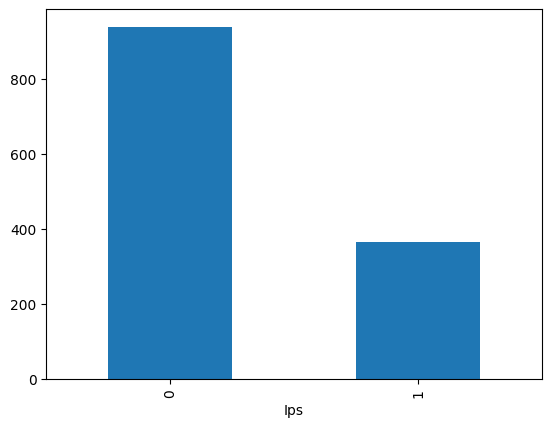

In [41]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

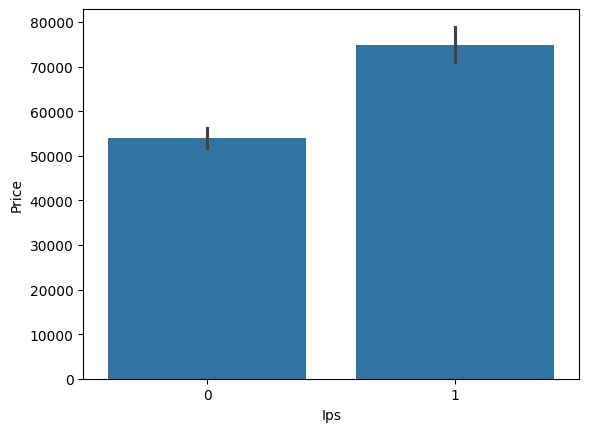

In [42]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [43]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [44]:
df['X_res'] = new[0]
df['Y_res'] = new[1]
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [45]:
df.sample(4)

Company   TypeName  Inches                    ScreenResolution  \
1141      MSI     Gaming    15.6                   Full HD 1920x1080   
222   Toshiba  Ultrabook    13.3                   Full HD 1920x1080   
1172     Asus   Notebook    15.6                            1366x768   
81      Apple  Ultrabook    12.0  IPS Panel Retina Display 2304x1440   

                                       Cpu  Ram                Memory  \
1141           Intel Core i7 7700HQ 2.8GHz    8  128GB SSD +  1TB HDD   
222             Intel Core i7 6500U 2.5GHz    8             256GB SSD   
1172  Intel Celeron Dual Core N3050 1.6GHz    4             500GB HDD   
81                    Intel Core i5 1.3GHz    8             512GB SSD   

                          Gpu       OpSys  Weight      Price  Touchscreen  \
1141  Nvidia GeForce GTX 1050  Windows 10    2.40  60888.384            0   
222     Intel HD Graphics 520  Windows 10    1.20  72620.640            0   
1172        Intel HD Graphics  Windows 10    2.20  19660.320            0   
81      Intel HD Graphics 615       macOS    0.92  80452.800            0   

      Ips X_res Y_res  
1141    0  1920  1080  
222     0  1920  1080  
1172    0  1366   768  
81      1  2304  1440

In [46]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [52]:
df.corr(numeric_only=True)['Price']



Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [53]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [55]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [56]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [57]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [58]:
df.sample(5)

Company     TypeName                          Cpu  Ram  \
475    Dell     Notebook   Intel Core i3 6100U 2.3GHz    8   
384    Asus    Ultrabook   Intel Core i7 7500U 2.7GHz   16   
615    Asus       Gaming  Intel Core i7 7700HQ 2.8GHz    8   
128    Dell     Notebook   Intel Core i7 8550U 1.8GHz   16   
451    Dell  Workstation  Intel Core i7 6820HQ 2.7GHz   16   

                   Memory                      Gpu       OpSys  Weight  \
475             128GB SSD    Intel HD Graphics 520  Windows 10    1.79   
384             512GB SSD    Intel HD Graphics 620  Windows 10    1.10   
615  128GB SSD +  1TB HDD  Nvidia GeForce GTX 1050  Windows 10    3.00   
128  256GB SSD +  2TB HDD           AMD Radeon 530  Windows 10    2.80   
451             256GB SSD       Nvidia Quadro M620  Windows 10    2.17   

          Price  Touchscreen  Ips         ppi  
475   39427.200            0    0  111.935204  
384   93181.392            1    0  165.632118  
615   62231.040            0    0  127.335675  
128   74378.880            0    0  127.335675  
451  105228.000            0    1  141.211998

In [59]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [60]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [61]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          ppi       Cpu Name  
0  226.983005  Intel Core i5  
1  127.677940  Intel Core i5  
2  141.211998  Intel Core i5  
3  220.534624  Intel Core i7  
4  226.983005  Intel Core i5

In [62]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [63]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [64]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          ppi       Cpu Name      Cpu brand  
0  226.983005  Intel Core i5  Intel Core i5  
1  127.677940  Intel Core i5  Intel Core i5  
2  141.211998  Intel Core i5  Intel Core i5  
3  220.534624  Intel Core i7  Intel Core i7  
4  226.983005  Intel Core i5  Intel Core i5

<Axes: xlabel='Cpu brand'>

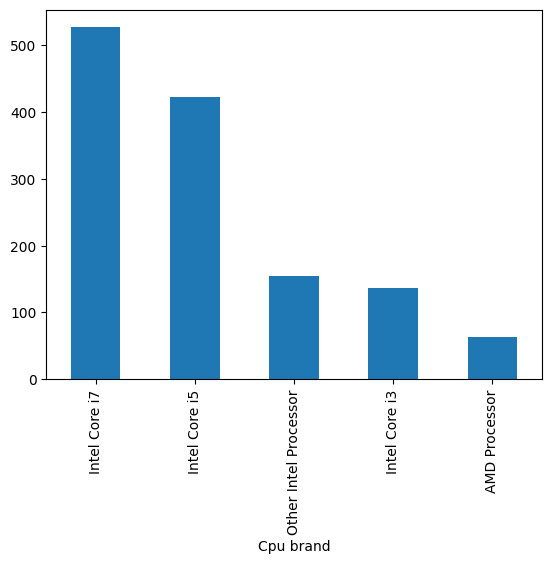

In [65]:
df['Cpu brand'].value_counts().plot(kind='bar')

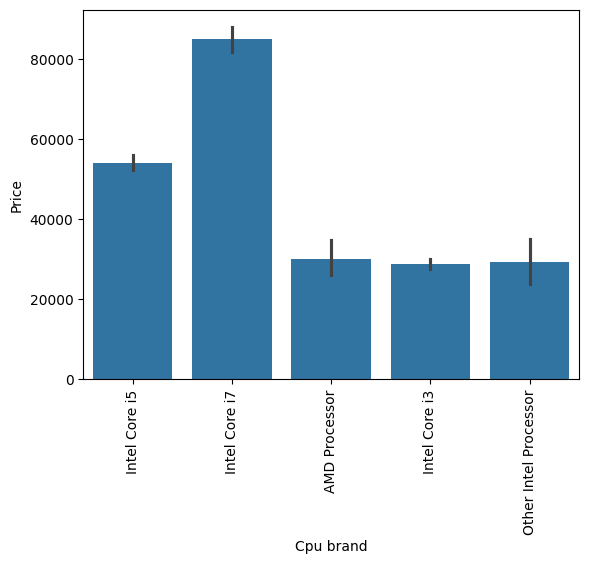

In [66]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [67]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          ppi       Cpu Name      Cpu brand  
0  226.983005  Intel Core i5  Intel Core i5  
1  127.677940  Intel Core i5  Intel Core i5  
2  141.211998  Intel Core i5  Intel Core i5  
3  220.534624  Intel Core i7  Intel Core i7  
4  226.983005  Intel Core i5  Intel Core i5

In [68]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [69]:
df.head()

Company   TypeName  Ram               Memory                           Gpu  \
0   Apple  Ultrabook    8            128GB SSD  Intel Iris Plus Graphics 640   
1   Apple  Ultrabook    8  128GB Flash Storage        Intel HD Graphics 6000   
2      HP   Notebook    8            256GB SSD         Intel HD Graphics 620   
3   Apple  Ultrabook   16            512GB SSD            AMD Radeon Pro 455   
4   Apple  Ultrabook    8            256GB SSD  Intel Iris Plus Graphics 650   

   OpSys  Weight        Price  Touchscreen  Ips         ppi      Cpu brand  
0  macOS    1.37   71378.6832            0    1  226.983005  Intel Core i5  
1  macOS    1.34   47895.5232            0    0  127.677940  Intel Core i5  
2  No OS    1.86   30636.0000            0    0  141.211998  Intel Core i5  
3  macOS    1.83  135195.3360            0    1  220.534624  Intel Core i7  
4  macOS    1.37   96095.8080            0    1  226.983005  Intel Core i5

<Axes: xlabel='Ram'>

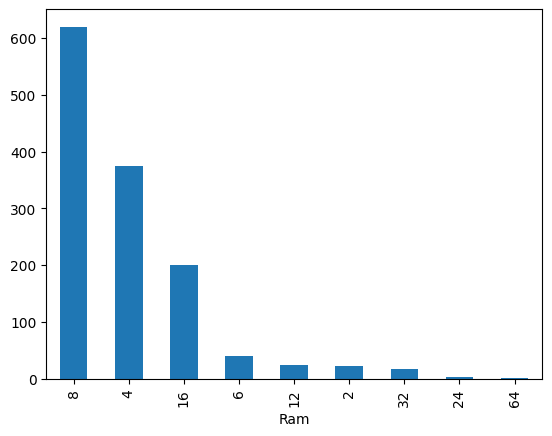

In [70]:
df['Ram'].value_counts().plot(kind='bar')

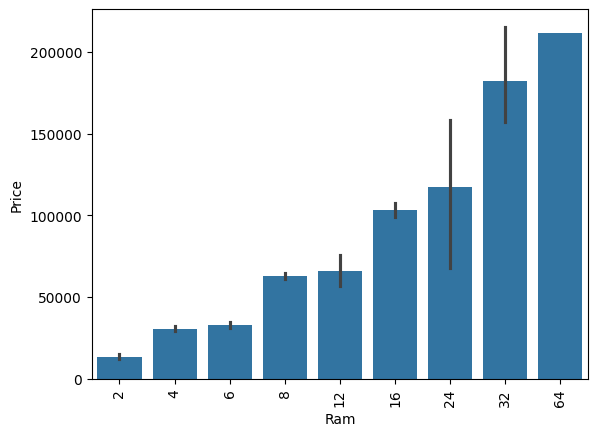

In [71]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [72]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                           1
512GB SSD +  512GB SSD             1
64GB Flash Storage +  1TB HDD      1
1TB HDD +  1TB HDD                 1
512GB SSD +  256GB SSD             1
32GB HDD                           1
128GB HDD                          1
240GB SSD                          1
8GB SSD                            1
508GB Hybrid                       1
1.0TB HDD                          1
512GB SSD +  1.0TB Hybrid          1
256GB SSD +  1.0TB Hybrid          1
Name: count, dtype: int64

In [73]:
import pandas as pd
import numpy as np

# Convert Memory column to string and clean up
df["Memory"] = df["Memory"].astype(str).replace(r"\.0$", "", regex=True)
df["Memory"] = df["Memory"].str.replace("GB", "", regex=False)
df["Memory"] = df["Memory"].str.replace("TB", "000", regex=False)

# Split Memory column into two parts if "+" is present
new = df["Memory"].str.split("+", n=1, expand=True)

# Extract values, ensuring proper stripping
df["first"] = new[0].str.strip()
df["second"] = new[1].str.strip().fillna("0")

# Identify storage types using NumPy for efficiency
df["Layer1HDD"] = np.where(df["first"].str.contains("HDD", na=False), 1, 0)
df["Layer1SSD"] = np.where(df["first"].str.contains("SSD", na=False), 1, 0)
df["Layer1Hybrid"] = np.where(df["first"].str.contains("Hybrid", na=False), 1, 0)
df["Layer1Flash_Storage"] = np.where(df["first"].str.contains("Flash Storage", na=False), 1, 0)

# Extract numeric values properly
df["first"] = df["first"].str.extract(r"(\d+)").fillna(0).astype(pd.Int64Dtype())
df["second"] = df["second"].str.extract(r"(\d+)").fillna(0).astype(pd.Int64Dtype())

# Identify storage types in the second storage layer
df["Layer2HDD"] = np.where(df["second"].astype(str).str.contains("HDD", na=False), 1, 0)
df["Layer2SSD"] = np.where(df["second"].astype(str).str.contains("SSD", na=False), 1, 0)
df["Layer2Hybrid"] = np.where(df["second"].astype(str).str.contains("Hybrid", na=False), 1, 0)
df["Layer2Flash_Storage"] = np.where(df["second"].astype(str).str.contains("Flash Storage", na=False), 1, 0)

# Compute total storage capacities
df["HDD"] = (df["first"] * df["Layer1HDD"]) + (df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"]) + (df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"]) + (df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"]) + (df["second"] * df["Layer2Flash_Storage"])

# Drop intermediate columns for a clean dataset
df.drop(columns=["first", "second", "Layer1HDD", "Layer1SSD", "Layer1Hybrid",
                 "Layer1Flash_Storage", "Layer2HDD", "Layer2SSD", "Layer2Hybrid",
                 "Layer2Flash_Storage"], inplace=True)

print(df.head())


  Company   TypeName  Ram             Memory                           Gpu  \
0   Apple  Ultrabook    8            128 SSD  Intel Iris Plus Graphics 640   
1   Apple  Ultrabook    8  128 Flash Storage        Intel HD Graphics 6000   
2      HP   Notebook    8            256 SSD         Intel HD Graphics 620   
3   Apple  Ultrabook   16            512 SSD            AMD Radeon Pro 455   
4   Apple  Ultrabook    8            256 SSD  Intel Iris Plus Graphics 650   

   OpSys  Weight        Price  Touchscreen  Ips         ppi      Cpu brand  \
0  macOS    1.37   71378.6832            0    1  226.983005  Intel Core i5   
1  macOS    1.34   47895.5232            0    0  127.677940  Intel Core i5   
2  No OS    1.86   30636.0000            0    0  141.211998  Intel Core i5   
3  macOS    1.83  135195.3360            0    1  220.534624  Intel Core i7   
4  macOS    1.37   96095.8080            0    1  226.983005  Intel Core i5   

   HDD  SSD  Hybrid  Flash_Storage  
0    0  128       0      

In [74]:
df.head()

Company   TypeName  Ram             Memory                           Gpu  \
0   Apple  Ultrabook    8            128 SSD  Intel Iris Plus Graphics 640   
1   Apple  Ultrabook    8  128 Flash Storage        Intel HD Graphics 6000   
2      HP   Notebook    8            256 SSD         Intel HD Graphics 620   
3   Apple  Ultrabook   16            512 SSD            AMD Radeon Pro 455   
4   Apple  Ultrabook    8            256 SSD  Intel Iris Plus Graphics 650   

   OpSys  Weight        Price  Touchscreen  Ips         ppi      Cpu brand  \
0  macOS    1.37   71378.6832            0    1  226.983005  Intel Core i5   
1  macOS    1.34   47895.5232            0    0  127.677940  Intel Core i5   
2  No OS    1.86   30636.0000            0    0  141.211998  Intel Core i5   
3  macOS    1.83  135195.3360            0    1  220.534624  Intel Core i7   
4  macOS    1.37   96095.8080            0    1  226.983005  Intel Core i5   

   HDD  SSD  Hybrid  Flash_Storage  
0    0  128       0              0  
1    0    0       0            128  
2    0  256       0              0  
3    0  512       0              0  
4    0  256       0              0

In [75]:
df.drop(columns=['Memory'],inplace=True)

In [77]:
df.corr(numeric_only=True)['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.379642
SSD              0.676202
Hybrid          -0.005061
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [78]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [80]:
df.sample(4)

Company   TypeName  Ram                    Gpu       OpSys  Weight  \
621   Lenovo   Notebook    8  Intel HD Graphics 520   Windows 7    1.65   
1216    Acer   Notebook    4   Nvidia GeForce 940MX  Windows 10    3.30   
235     Dell   Notebook   16     AMD Radeon R7 M445       Linux    2.36   
1289    Asus  Ultrabook    8  Intel HD Graphics 515  Windows 10    1.20   

         Price  Touchscreen  Ips         ppi              Cpu brand   HDD  SSD  
621   78055.20            0    0  157.350512          Intel Core i5     0  256  
1216  31861.44            0    0  106.113062          Intel Core i3  1000    0  
235   47898.72            0    0  141.211998          Intel Core i7     0  256  
1289  38841.12            0    1  165.632118  Other Intel Processor     0  512

In [81]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [82]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [83]:
df.sample(6)

Company            TypeName  Ram                     Gpu       OpSys  \
1036      HP            Notebook    4   Intel HD Graphics 620  Windows 10   
1132    Asus            Notebook    4   Intel HD Graphics 500  Windows 10   
1177  Lenovo              Gaming   16  Nvidia GeForce GTX 960  Windows 10   
1125  Lenovo  2 in 1 Convertible    8   Intel HD Graphics 520  Windows 10   
572       HP            Notebook    6          AMD Radeon 530  Windows 10   
208     Dell           Ultrabook    8  Intel UHD Graphics 620  Windows 10   

      Weight     Price  Touchscreen  Ips         ppi              Cpu brand  \
1036    2.04  39533.76            0    0  100.454670          Intel Core i5   
1132    1.50  14811.84            0    0  111.935204  Other Intel Processor   
1177    3.31  69530.40            0    1  141.211998          Intel Core i7   
1125    1.80  88924.32            1    1  157.350512          Intel Core i7   
572     1.95  34578.72            0    1  141.211998          AMD Processor   
208     1.20  77202.72            0    0  165.632118          Intel Core i7   

      HDD  SSD Gpu brand  
1036  500    0     Intel  
1132    0    0     Intel  
1177    0  512    Nvidia  
1125    0  256     Intel  
572     0  256       AMD  
208     0  256     Intel

In [84]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [85]:
df = df[df['Gpu brand'] != 'ARM']

In [86]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

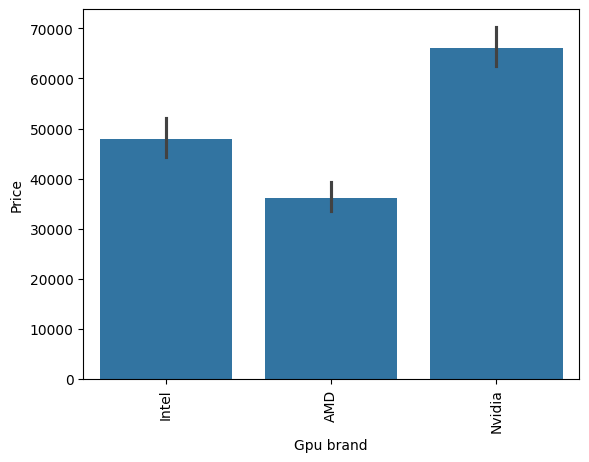

In [87]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.drop(columns=['Gpu brand'],inplace=True)

In [100]:
df.head()

Company   TypeName  Ram  OpSys  Weight        Price  Touchscreen  Ips  \
0   Apple  Ultrabook    8  macOS    1.37   71378.6832            0    1   
1   Apple  Ultrabook    8  macOS    1.34   47895.5232            0    0   
2      HP   Notebook    8  No OS    1.86   30636.0000            0    0   
3   Apple  Ultrabook   16  macOS    1.83  135195.3360            0    1   
4   Apple  Ultrabook    8  macOS    1.37   96095.8080            0    1   

          ppi      Cpu brand  HDD  SSD  
0  226.983005  Intel Core i5    0  128  
1  127.677940  Intel Core i5    0    0  
2  141.211998  Intel Core i5    0  256  
3  220.534624  Intel Core i7    0  512  
4  226.983005  Intel Core i5    0  256

In [101]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

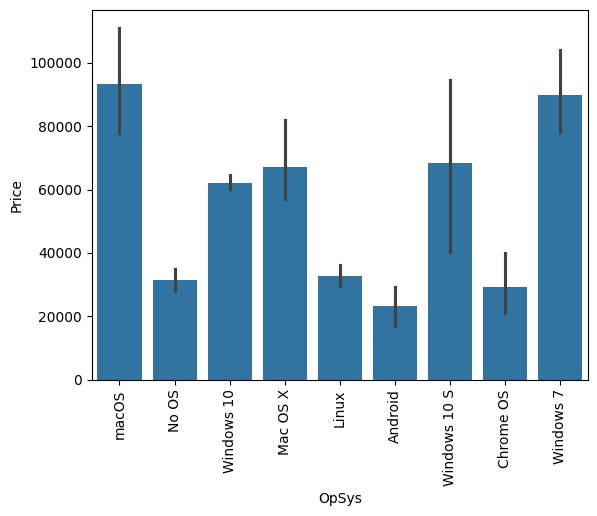

In [102]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [103]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [104]:
df['os'] = df['OpSys'].apply(cat_os)

In [105]:
df.sample()

Company TypeName  Ram       OpSys  Weight     Price  Touchscreen  Ips  \
282  Lenovo   Gaming    8  Windows 10     2.5  44169.12            0    1   

            ppi      Cpu brand  HDD  SSD       os  
282  141.211998  Intel Core i5    0  256  Windows

In [106]:
df.drop(columns=['OpSys'],inplace=True)

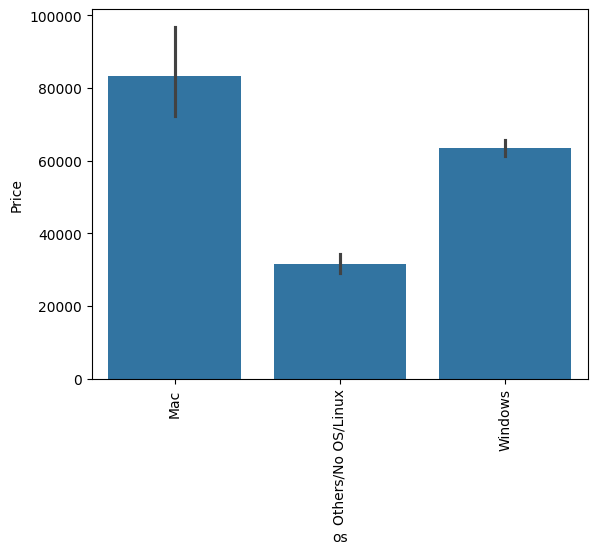

In [107]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Count'>

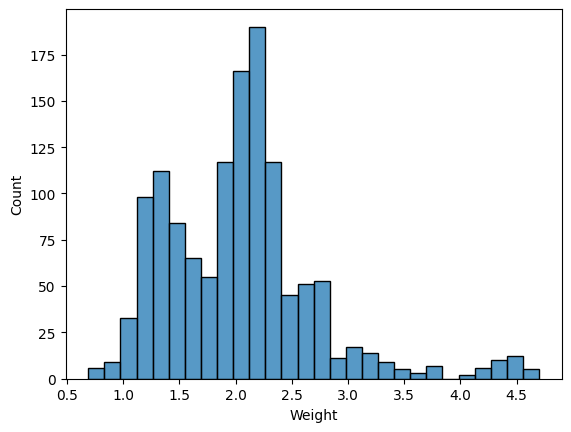

In [108]:
sns.histplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

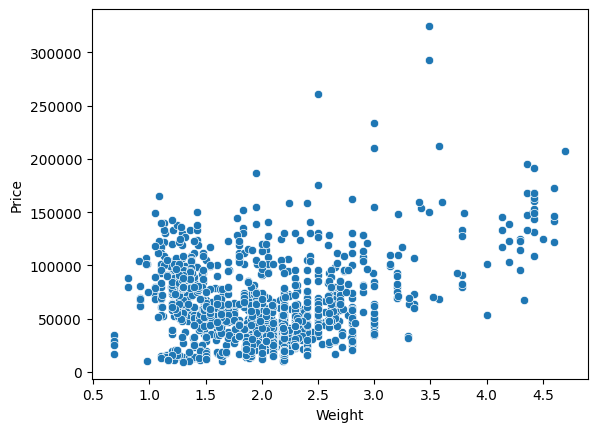

In [109]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [111]:
df.corr(numeric_only=True)['Price']


Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.380048
SSD            0.676066
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

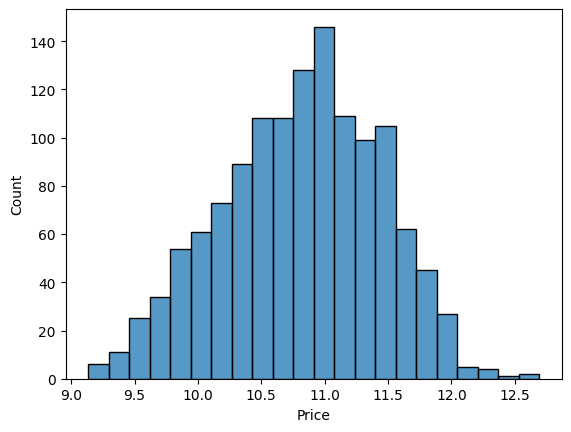

In [114]:
sns.histplot(np.log(df['Price']))

In [115]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [117]:
X


Company            TypeName  Ram  Weight  Touchscreen  Ips         ppi  \
0      Apple           Ultrabook    8    1.37            0    1  226.983005   
1      Apple           Ultrabook    8    1.34            0    0  127.677940   
2         HP            Notebook    8    1.86            0    0  141.211998   
3      Apple           Ultrabook   16    1.83            0    1  220.534624   
4      Apple           Ultrabook    8    1.37            0    1  226.983005   
...      ...                 ...  ...     ...          ...  ...         ...   
1298  Lenovo  2 in 1 Convertible    4    1.80            1    1  157.350512   
1299  Lenovo  2 in 1 Convertible   16    1.30            1    1  276.053530   
1300  Lenovo            Notebook    2    1.50            0    0  111.935204   
1301      HP            Notebook    6    2.19            0    0  100.454670   
1302    Asus            Notebook    4    2.20            0    0  100.454670   

                  Cpu brand   HDD  SSD                  os  
0             Intel Core i5     0  128                 Mac  
1             Intel Core i5     0    0                 Mac  
2             Intel Core i5     0  256  Others/No OS/Linux  
3             Intel Core i7     0  512                 Mac  
4             Intel Core i5     0  256                 Mac  
...                     ...   ...  ...                 ...  
1298          Intel Core i7     0  128             Windows  
1299          Intel Core i7     0  512             Windows  
1300  Other Intel Processor     0    0             Windows  
1301          Intel Core i7  1000    0             Windows  
1302  Other Intel Processor   500    0             Windows  

[1302 rows x 11 columns]

In [118]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [122]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', sparse_output=False), [0, 1, 7, 10]) # Changed from [0, 1, 7, 10, 11] to [0, 1, 7, 10]
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8123876080301597
MAE 0.20773515947348062


In [123]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8054871894322854
MAE 0.21467770244820214


In [124]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8113135819389076
MAE 0.20975315907563388


In [125]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8125168309538907
MAE 0.19201271121135663


In [126]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

R2 score 0.8303781658629203


In [127]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8232712080238958
MAE 0.2022902233354634


In [128]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8826380933495079
MAE 0.16206946723755342


In [129]:
X_test

Company            TypeName  Ram  Weight  Touchscreen  Ips         ppi  \
248       HP            Notebook    4    1.49            0    1  165.632118   
555     Asus            Notebook    4    2.00            0    0  100.454670   
1251      HP            Notebook    4    1.86            0    0  100.454670   
547   Lenovo            Notebook    4    2.15            0    0  141.211998   
885       HP  2 in 1 Convertible    4    1.28            1    0  165.632118   
...      ...                 ...  ...     ...          ...  ...         ...   
1129      HP              Gaming    8    3.35            0    1  127.335675   
172   Lenovo            Notebook    4    2.20            0    0  100.454670   
322     Asus            Notebook    8    2.00            0    0  157.350512   
996       HP           Ultrabook    8    1.11            1    1  165.632118   
470       HP  2 in 1 Convertible    8    1.29            1    1  331.264236   

                  Cpu brand   HDD  SSD                  os  
248           Intel Core i5   500    0             Windows  
555   Other Intel Processor   500    0  Others/No OS/Linux  
1251          AMD Processor   500    0             Windows  
547           Intel Core i5  1000    0  Others/No OS/Linux  
885           Intel Core i5     0  256             Windows  
...                     ...   ...  ...                 ...  
1129          Intel Core i5     0  128             Windows  
172           AMD Processor   500    0  Others/No OS/Linux  
322           Intel Core i7     0  256             Windows  
996           Intel Core i7     0  256             Windows  
470           Intel Core i7     0  512             Windows  

[196 rows x 11 columns]

In [131]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              bootstrap=True,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.891004870264871
MAE 0.15973205014021055


In [133]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8003594241873399
MAE 0.2272602082722667


In [134]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8817158369941869
MAE 0.1600837256921116


In [136]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8816151165016725
MAE 0.1582756034354006


In [138]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,bootstrap=True,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,bootstrap=True,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8872919227825304
MAE 0.16106876443405418


In [139]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8778348978888644
MAE 0.16724175536816183


In [140]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8826380933495079
MAE 0.16206946723755342


In [141]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [153]:
df

Company            TypeName  Ram  Weight        Price  Touchscreen  Ips  \
0      Apple           Ultrabook    8    1.37   71378.6832            0    1   
1      Apple           Ultrabook    8    1.34   47895.5232            0    0   
2         HP            Notebook    8    1.86   30636.0000            0    0   
3      Apple           Ultrabook   16    1.83  135195.3360            0    1   
4      Apple           Ultrabook    8    1.37   96095.8080            0    1   
...      ...                 ...  ...     ...          ...          ...  ...   
1298  Lenovo  2 in 1 Convertible    4    1.80   33992.6400            1    1   
1299  Lenovo  2 in 1 Convertible   16    1.30   79866.7200            1    1   
1300  Lenovo            Notebook    2    1.50   12201.1200            0    0   
1301      HP            Notebook    6    2.19   40705.9200            0    0   
1302    Asus            Notebook    4    2.20   19660.3200            0    0   

             ppi              Cpu brand   HDD  SSD                  os  
0     226.983005          Intel Core i5     0  128                 Mac  
1     127.677940          Intel Core i5     0    0                 Mac  
2     141.211998          Intel Core i5     0  256  Others/No OS/Linux  
3     220.534624          Intel Core i7     0  512                 Mac  
4     226.983005          Intel Core i5     0  256                 Mac  
...          ...                    ...   ...  ...                 ...  
1298  157.350512          Intel Core i7     0  128             Windows  
1299  276.053530          Intel Core i7     0  512             Windows  
1300  111.935204  Other Intel Processor     0    0             Windows  
1301  100.454670          Intel Core i7  1000    0             Windows  
1302  100.454670  Other Intel Processor   500    0             Windows  

[1302 rows x 12 columns]

In [162]:
query = np.array(['Asus','Notebook','8' ,'1.7' ,'0','1' ,'141.21199808219862','Intel Core i7' ,'0' ,'512','Windows'])
query = query.reshape(1, 11)
# Convert numeric strings to actual numbers
query = query.astype(object) # Change the data type of the array to object
query[:, 2] = query[:, 2].astype(np.int64)  # Ram
query[:, 3] = query[:, 3].astype(np.float64) # Weight
query[:, 4] = query[:, 4].astype(np.int64)  # Touchscreen
query[:, 5] = query[:, 5].astype(np.int64)  # IPS
query[:, 6] = query[:, 6].astype(np.float64)  # ppi - This column was missing conversion
query[:, 8] = query[:, 8].astype(np.int64)  # HDD
query[:, 9] = query[:, 9].astype(np.int64)  # SSD

np.exp(pipe.predict(query))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([66417.4284344])